In [ ]:
import pandas as pd
! pip install pyfixest -q
import pyfixest as pf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Overview

In [ ]:
path_to_data = "https://raw.githubusercontent.com/sshi24/EEMP2024_group_project_EWSS/refs/heads/main/Data/07.11.2024_Data_Python_Project_part-1-oecd-alcohol-consumption-1950-to-2015_fixed.csv"
df = pd.read_csv(path_to_data,index_col=False)

# Overview headers and shape of df
pd.set_option('display.max_columns', None)
df

,Year,Cons_pc_Beer,Cons_pc_Wine,Cons_pc_Spirits,Cons_pc_Alkohol,Exp_pc_Beer,Exp_pc_Wine,Exp_pc_Spirits,Exp_pc_Alkohol,Exp_pc_Total,Exp_pc_Residual,Prices_Beer,Prices_Wine,Prices_Spirits,Prices_Alcohol,CPI_Beer,CPI_Wine,CPI_Spirits,CPI_Alcohol,CPI_AllGoods,Population,Real_GDPPC,Cond_Bugdget_Shares_Beer,Cond_Bugdget_Shares_Wine,Cond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Beer,Uncond_Bugdget_Shares_Wine,Uncond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Alcohol,Volume_Shares_Beer,Volume_Shares_Wine,Volume_Shares_Spirits,Exchange_Rate,Expenditure_pc_USD_Beer,Expenditure_pc_USD_Wine,Expenditure_pc_USD_Spirits,Expenditure_pc_USD_Alcohol,Expenditure_pc_USD_Total,Expenditure_pc_USD_Residuals,Price_USD_Beer,Price_USD_Wine,Price_USD_Spirits,Price_USD_Alcohol,Country
0,1970,6.13,1.67,1.06,8.86,66.22,23.98,15.54,105.74,1560.56,1454.83,10.80,14.32,14.70,12.31,7.04,17.36,6.85,0.00,8.86,12660.16,12023.54,0.63,0.23,0.15,0.04,0.02,0.01,0.07,0.69,0.19,0.12,0.90,73.74,26.70,17.31,117.75,1737.82,1620.08,12.03,15.95,16.37,13.71,Australia
1,1971,6.15,1.35,1.10,8.60,70.16,20.47,16.18,106.81,1681.89,1575.09,11.40,15.20,14.75,12.75,7.43,18.42,6.88,0.00,9.40,12937.20,12289.52,0.66,0.19,0.15,0.04,0.01,0.01,0.06,0.72,0.16,0.13,0.88,79.72,23.26,18.39,121.37,1911.24,1789.87,12.95,17.27,16.76,14.48,Australia
2,1972,6.30,1.55,1.24,9.10,75.59,23.50,18.51,117.59,1828.79,1711.20,12.00,15.12,14.88,13.23,7.83,18.33,6.93,9.01,9.97,13177.00,12404.42,0.64,0.20,0.16,0.04,0.01,0.01,0.06,0.69,0.17,0.14,0.84,90.09,28.01,22.06,140.16,2179.73,2039.57,14.30,18.02,17.73,15.76,Australia
3,1973,6.87,1.61,1.26,9.74,89.31,24.94,23.03,137.27,2007.49,1870.21,13.00,15.52,18.23,14.36,8.48,18.81,8.50,9.76,10.87,13380.40,12878.09,0.65,0.18,0.17,0.04,0.01,0.01,0.07,0.71,0.16,0.13,0.71,126.68,35.37,32.66,194.71,2847.50,2652.79,18.44,22.01,25.85,20.37,Australia
4,1974,7.00,1.77,1.21,9.98,103.54,31.91,27.84,163.30,2352.21,2188.92,14.80,18.00,22.98,16.67,9.65,21.82,10.71,10.98,12.55,13599.10,12985.12,0.63,0.20,0.17,0.04,0.01,0.01,0.07,0.70,0.18,0.12,0.70,148.99,45.92,40.06,234.96,3384.48,3149.52,21.29,25.90,33.06,23.99,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2010,3.09,2.26,1.85,7.21,213.28,189.55,150.06,552.89,16022.37,15469.48,68.92,83.92,81.03,77.61,94.29,90.10,85.47,88.50,89.40,62766.37,23777.16,0.39,0.34,0.27,0.01,0.01,0.01,0.03,0.43,0.31,0.26,0.65,329.41,292.76,231.77,853.94,24746.41,23892.48,106.44,129.62,125.16,119.87,UK
1076,2011,3.00,2.38,1.78,7.17,216.81,207.86,155.78,580.45,16504.98,15924.53,72.24,87.25,87.31,81.65,98.83,93.67,92.09,93.66,93.40,63258.92,24057.35,0.37,0.36,0.27,0.01,0.01,0.01,0.04,0.42,0.33,0.25,0.62,347.56,333.21,249.73,930.49,26458.37,25527.88,115.81,139.86,139.96,130.90,UK
1077,2012,2.85,2.32,1.78,6.95,208.21,203.92,159.50,571.63,16995.88,16424.25,73.17,87.71,89.78,82.93,100.10,94.17,94.70,96.30,96.10,63695.69,24174.09,0.36,0.36,0.28,0.01,0.01,0.01,0.03,0.41,0.33,0.26,0.63,329.93,323.13,252.74,905.80,26931.55,26025.75,115.95,138.99,142.27,131.41,UK
1078,2013,2.78,2.07,1.72,6.57,204.33,186.43,163.91,554.67,17599.61,17044.95,73.46,90.08,95.30,85.31,100.50,96.71,100.52,99.61,98.50,64097.09,24541.57,0.37,0.34,0.30,0.01,0.01,0.01,0.03,0.42,0.31,0.26,0.64,319.39,291.42,256.21,867.02,27510.33,26643.32,114.83,140.80,148.96,133.35,UK


### Price of Wine in USD

In [ ]:
# Convert Price_USD_Wine into numeric
df.Price_USD_Wine = pd.to_numeric(df.Price_USD_Wine, errors='coerce')
df.Price_USD_Wine.describe()

,Price_USD_Wine
count,661.000000
mean,66.379864
std,50.658302
min,0.120000
25%,28.340000
50%,59.810000
75%,96.790000
max,282.170000


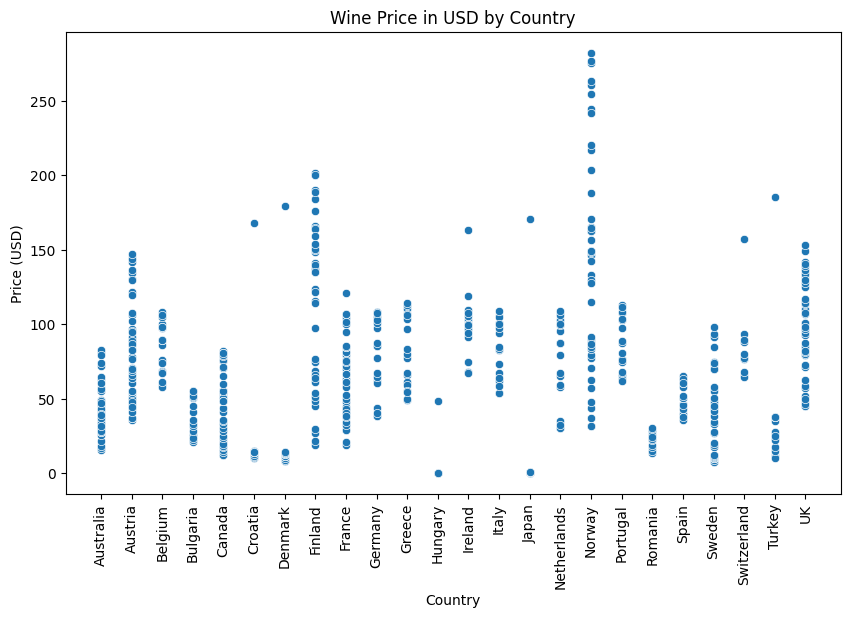

In [ ]:
# Check outliers in Price_USD_Wine
## Plot Price_USD_Wine by Country in a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country', y='Price_USD_Wine', data=df)
plt.xticks(rotation=90)
plt.title('Wine Price in USD by Country')
plt.xlabel('Country')
plt.ylabel('Price (USD)')
plt.show()

In [ ]:
dfagg_p = df[df.Price_USD_Wine.isnull()==False]

# Convert Price_USD_Wine to numeric, forcing non-numeric entries to NaN
dfagg_p['Price_USD_Wine'] = pd.to_numeric(dfagg_p['Price_USD_Wine'], errors='coerce')

# Group by 'Country' and calculate the mean of 'Price_USD_Wine', then reset index
dfagg_p = dfagg_p.groupby('Country', as_index=False)['Price_USD_Wine'].mean()

# Sort values of 'Price_USD_Wine'
dfagg_p.sort_values('Price_USD_Wine', ascending=False)

<ipython-input-85-548d47ded86f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfagg_p['Price_USD_Wine'] = pd.to_numeric(dfagg_p['Price_USD_Wine'], errors='coerce')


,Country,Price_USD_Wine
16,Norway,145.068222
7,Finland,117.298140
12,Ireland,100.196316
23,UK,99.311556
17,Portugal,86.465789
21,Switzerland,86.038000
2,Belgium,85.036316
1,Austria,84.594444
10,Greece,82.538421
13,Italy,80.181579


<Axes: xlabel='Price_USD_Wine', ylabel='Country'>

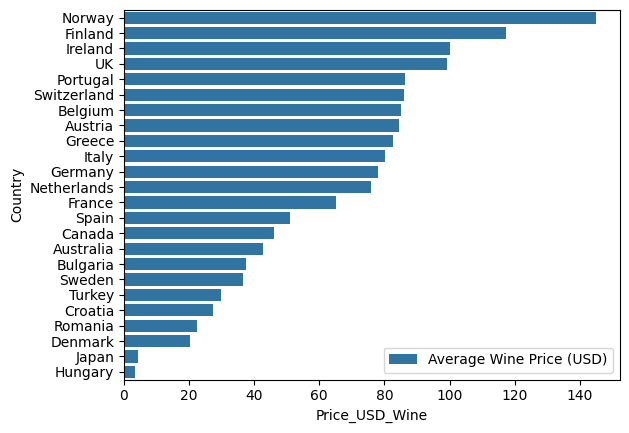

In [ ]:
sns.barplot(dfagg_p.sort_values('Price_USD_Wine', ascending=False), y='Country', x='Price_USD_Wine', label='Average Wine Price (USD)')

### Wine Consumption per capita

In [ ]:
df.Cons_pc_Wine = pd.to_numeric(df.Cons_pc_Wine, errors='coerce')

# Sort average yearly Wine Consumption per capita by country
dfagg_cons = df[df.Cons_pc_Wine.isnull()==False]
dfagg_cons['Cons_pc_Wine'] = pd.to_numeric(dfagg_cons['Cons_pc_Wine'], errors='coerce')

dfagg_cons = df.groupby('Country').Cons_pc_Wine.mean().reset_index()
dfagg_cons.sort_values('Cons_pc_Wine', ascending=False)

<ipython-input-93-28740cf101f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfagg_cons['Cons_pc_Wine'] = pd.to_numeric(dfagg_cons['Cons_pc_Wine'], errors='coerce')


,Country,Cons_pc_Wine
8,France,8.039111
17,Portugal,7.682000
13,Italy,7.395111
5,Croatia,4.943571
21,Switzerland,4.608444
19,Spain,4.575778
1,Austria,4.575778
10,Greece,3.859111
11,Hungary,3.507111
2,Belgium,3.258667


<Axes: xlabel='Cons_pc_Wine', ylabel='Country'>

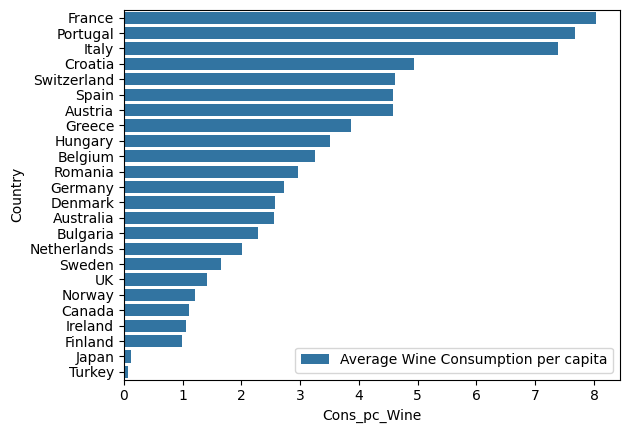

In [ ]:
# Plot in a bar chart
sns.barplot(dfagg_cons.sort_values('Cons_pc_Wine', ascending=False), y='Country', x='Cons_pc_Wine', label='Average Wine Consumption per capita') # need to be improved

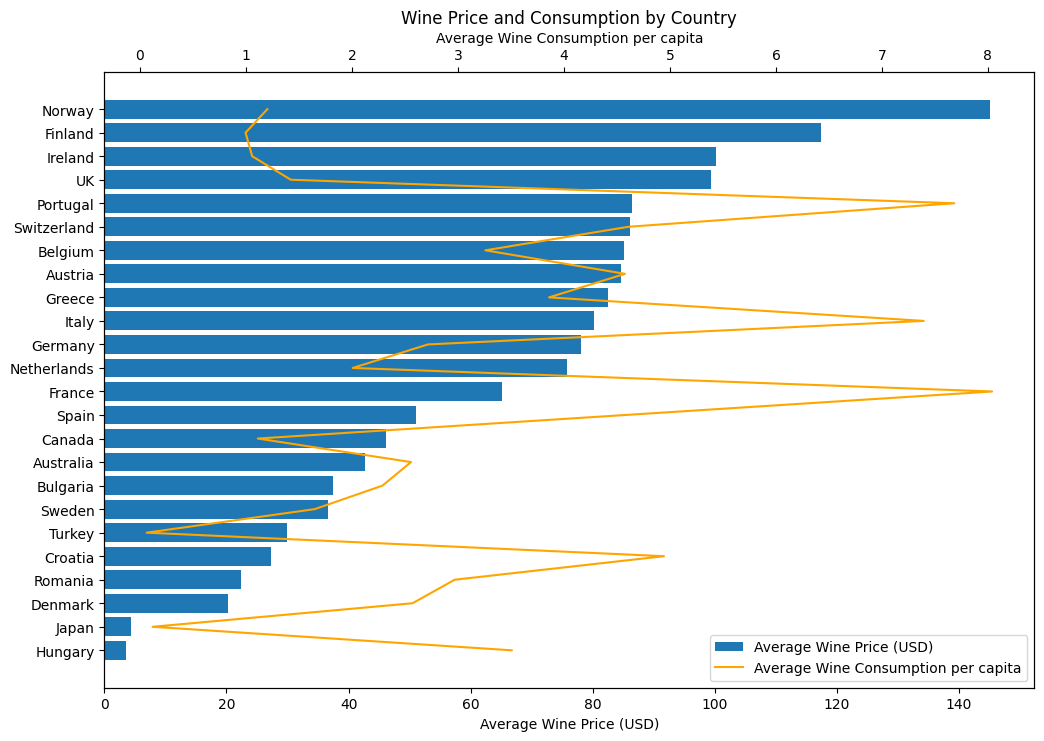

In [ ]:
# Sort dfagg_p by Price_USD_Wine in descending order
dfagg_p_sorted = dfagg_p.sort_values('Price_USD_Wine', ascending=True)

# Get the order of countries based on Price_USD_Wine
country_order = dfagg_p_sorted['Country'].tolist()

# Filter dfagg_cons to include only countries present in country_order
dfagg_cons_filtered = dfagg_cons[dfagg_cons['Country'].isin(country_order)]

# Reorder dfagg_cons_filtered based on country_order
dfagg_cons_ordered = dfagg_cons_filtered.set_index('Country').loc[country_order].reset_index()


fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Price_USD_Wine as a bar chart on the left axis
ax1.barh(dfagg_p_sorted['Country'], dfagg_p_sorted['Price_USD_Wine'], label='Average Wine Price (USD)')
ax1.set_xlabel('Average Wine Price (USD)')

# Create a secondary y-axis on the right
ax2 = ax1.twiny()

# Plot Cons_pc_Wine as a line chart on the right axis, using the same y-axis order as Cons_pc_Wine
ax2.plot(dfagg_cons_ordered['Cons_pc_Wine'], dfagg_cons_ordered['Country'], color='orange', label='Average Wine Consumption per capita')
ax2.set_xlabel('Average Wine Consumption per capita')

# Set the title of the plot
plt.title('Wine Price and Consumption by Country')

# Add a legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.show()

# Subset of Canada and Italy

In [ ]:
# Create a subset of the DataFrame with only data for Germany and Portugal
subset_df = df[df['Country'].isin(['Canada', 'Italy'])]


# Regression

In [ ]:
reg1 = pf.feols('Prices_Wine ~ Cons_pc_Wine', data=df)
pf.etable(reg1) #**************

GT(_tbl_data=  level_0        level_1                         0
0    coef   Cons_pc_Wine   -39.501** <br> (15.052)
1    coef      Intercept  321.647*** <br> (52.710)
2   stats   Observations                       662
3   stats      S.E. type                       iid
4   stats  R<sup>2</sup>                     0.010, _body=<great_tables._gt_data.Body object at 0x7cfbbfb48d90>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7cfbbfb4beb0>, _spanners=Spanners([SpannerInfo(spanner_id='Prices_Wine', spanner_level=1, spanner_label='Prices_Wine', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7cfbbfb49270>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=T

<Axes: xlabel='Cons_pc_Wine', ylabel='Prices_Wine'>

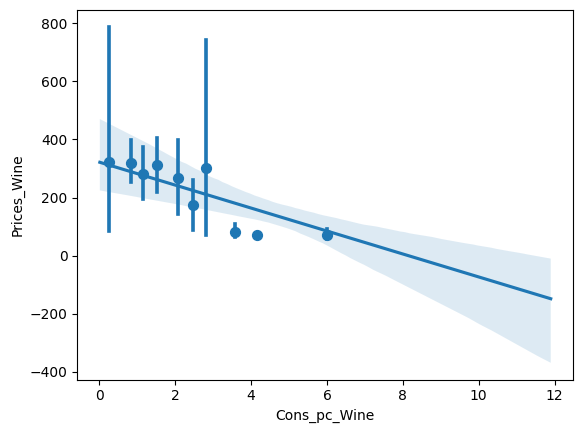

In [ ]:
# Illustrate connection
sns.regplot(df, y='Prices_Wine', x='Cons_pc_Wine', x_bins=10, order=1) # order = 1 need to be reassured


Interpretation:


## Interaction effect (in subset)

In [ ]:
# Create a dummy variable for countries whose average Volume_Shares_Wine is >= 0.33
df['Volume_Shares_Wine'] = pd.to_numeric(df['Volume_Shares_Wine'], errors='coerce')

# Calculate the average Volume_Shares_Wine for each country
avg_volume_shares_wine = df.groupby('Country')['Volume_Shares_Wine'].mean()
avg_volume_shares_wine2 = subset_df.groupby('Country')['Volume_Shares_Wine'].mean()

# Create a new column 'dummy_high_wine_consumption' with 1 if the average Volume_Shares_Wine is >= 0.33, 0 otherwise
df['dummy_wine_preference'] = 0
df.loc[df['Country'].isin(avg_volume_shares_wine[avg_volume_shares_wine >= 0.33].index), 'dummy_wine_preference'] = 1

subset_df['dummy_wine_preference'] = 0
subset_df.loc[df['Country'].isin(avg_volume_shares_wine2[avg_volume_shares_wine2 >= 0.33].index), 'dummy_wine_preference'] = 1

<ipython-input-138-3258cbfd2b1d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['dummy_wine_preference'] = 0


In [ ]:
reg_inter = pf.feols('Prices_Wine ~ Cons_pc_Wine*dummy_wine_preference', data=subset_df)
pf.etable(reg_inter)

GT(_tbl_data=  level_0                             level_1                         0
0    coef                        Cons_pc_Wine    62.656*** <br> (7.358)
1    coef               dummy_wine_preference  118.813*** <br> (24.134)
2    coef  Cons_pc_Wine:dummy_wine_preference   -70.562*** <br> (8.594)
3    coef                           Intercept      -13.645 <br> (8.457)
4   stats                        Observations                        64
5   stats                           S.E. type                       iid
6   stats                       R<sup>2</sup>                     0.575, _body=<great_tables._gt_data.Body object at 0x7cfbbe1ada50>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7cfbbe1ac220>, _spanners=Spanners([SpannerInfo(spanner_id='Prices_Wine', spanner_level=1, spanner_label='Prices_Wine', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7cfbbe1ae7a0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, catego

Interpretation:

In [ ]:
# Add control variables
reg2_1 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Population', data=df)
reg2_2 = pf.feols('Prices_Wine ~ Cons_pc_Wine + CPI_Wine', data=df)
reg2_3 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Real_GDPPC', data=df)

reg2_4 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Population + CPI_Wine', data=df)
reg2_5 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Population + Real_GDPPC', data=df)
reg2_6 = pf.feols('Prices_Wine ~ Cons_pc_Wine + CPI_Wine + Real_GDPPC', data=df)
reg2_7 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Population + CPI_Wine + Real_GDPPC', data=df)
pf.etable([reg2_1, reg2_2, reg2_3, reg2_4, reg2_5, reg2_6, reg2_7])

GT(_tbl_data=  level_0        level_1                         0                        1  \
0    coef   Cons_pc_Wine   -45.261** <br> (15.073)  -39.858** <br> (15.029)   
1    coef     Population     -0.003** <br> (0.001)                            
2    coef       CPI_Wine                                 2.278 <br> (1.282)   
3    coef     Real_GDPPC                                                      
4    coef      Intercept  428.988*** <br> (62.900)   156.198 <br> (106.932)   
5   stats   Observations                       662                      662   
6   stats      S.E. type                       iid                      iid   
7   stats  R<sup>2</sup>                     0.024                    0.015   

                           2                        3  \
0    -39.414** <br> (15.058)  -46.702** <br> (15.027)   
1                              -0.004*** <br> (0.001)   
2                                 3.196* <br> (1.297)   
3        -0.004 <br> (0.006)                            
4  394.689*** <br> (114.578)  214.385* <br> (107.294)   
5                        662                      662   
6                        iid                      iid   
7                      0.011                    0.033   

                           4                        5  \
0    -45.161** <br> (15.080)  -39.810** <br> (15.003)   
1      -0.003** <br> (0.001)                            
2                                 3.585* <br> (1.466)   
3        -0.004 <br> (0.006)      -0.012 <br> (0.007)   
4  497.548*** <br> (118.677)  273.100* <br> (124.513)   
5                        662                      662   
6                        iid                      iid   
7                      0.025                    0.020   

                          6  
0   -47.068** <br> (14.984)  
1    -0.004*** <br> (0.001)  
2      4.824** <br> (1.489)  
3      -0.015* <br> (0.007)  
4  358.525** <br> (125.407)  
5                       662  
6                       iid  
7                     0.040  , _body=<great_tables._gt_data.Body object at 0x7cfbc8250640>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None), ColInfo(var='4', type=<ColInfoTypeEnum.default: 1>, column_label='(5)', column_align='center', column_width=None), ColInfo(var='5', type=<ColInfoTypeEnum.default: 1>, column_label='(6)', column_align='center', column_width=None), ColInfo(var='6', type=<ColInfoTypeEnum.default: 1>, column_label='(7)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7cfbbfbdd480>, _spanners=Spanners([SpannerInfo(spanner_id='Prices_Wine', spanner_level=1, spanner_label='Prices_Wine', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3', '4', '5', '6'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7cfbbfbdf100>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px

Interpretation:

- add Population as a control variable
- Real_GDPPC does not significantly impact wine price
- not sure about CPI_Wine

Reason:
- tbc

In [ ]:
# Bad control variable: Cond_Bugdget_Shares_Wine
reg3_1 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Cond_Bugdget_Shares_Wine', data=df)
reg3_2 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Population + Cond_Bugdget_Shares_Wine', data=df)

pf.etable([reg1, reg3_1, reg2_1, reg3_2])

GT(_tbl_data=  level_0                   level_1                         0  \
0    coef              Cons_pc_Wine   -39.501** <br> (15.052)   
1    coef  Cond_Bugdget_Shares_Wine                             
2    coef                Population                             
3    coef                 Intercept  321.647*** <br> (52.710)   
4   stats              Observations                       662   
5   stats                 S.E. type                       iid   
6   stats             R<sup>2</sup>                     0.010   

                            1                         2  \
0   -183.861*** <br> (23.154)   -45.261** <br> (15.073)   
1  2927.406*** <br> (367.866)                             
2                                 -0.003** <br> (0.001)   
3        15.900 <br> (63.363)  428.988*** <br> (62.900)   
4                         662                       662   
5                         iid                       iid   
6                       0.097                     0.024   

                            3  
0   -180.910*** <br> (23.543)  
1  2840.587*** <br> (388.301)  
2         -0.001 <br> (0.001)  
3        49.755 <br> (79.698)  
4                         662  
5                         iid  
6                       0.098  , _body=<great_tables._gt_data.Body object at 0x7cfbbfeff730>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7cfbbfeff670>, _spanners=Spanners([SpannerInfo(spanner_id='Prices_Wine', spanner_level=1, spanner_label='Prices_Wine', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7cfbbfeffd90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', t

Reason:
- tbc

In [ ]:
# Add fixed effect due to panel data
reg4_1 = pf.feols('Prices_Wine ~ Cons_pc_Wine | Year ', data=df)
reg4_2 = pf.feols('Prices_Wine ~ Cons_pc_Wine | Country', data=df)
reg4_3 = pf.feols('Prices_Wine ~ Cons_pc_Wine | Year + Country', data=df)

reg4_4 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Population | Year ', data=df)
reg4_5 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Population | Country', data=df)
reg4_6 = pf.feols('Prices_Wine ~ Cons_pc_Wine + Population | Year + Country', data=df)
pf.etable([reg4_1, reg4_2, reg4_3, reg4_4, reg4_5, reg4_6])

GT(_tbl_data=  level_0        level_1                        0                     1  \
0    coef   Cons_pc_Wine  -40.557** <br> (14.332)  20.853 <br> (31.719)   
1    coef     Population                                                  
2      fe           Year                        x                     -   
3      fe        Country                        -                     x   
4   stats   Observations                      662                   662   
5   stats      S.E. type                 by: Year           by: Country   
6   stats  R<sup>2</sup>                    0.096                 0.097   

                        2                        3                       4  \
0  41.107*** <br> (7.032)  -45.781** <br> (15.372)   -21.754 <br> (87.775)   
1                           -0.003*** <br> (0.000)  -0.122*** <br> (0.026)   
2                       x                        x                       -   
3                       x                        -                       x   
4                     662                      662                     662   
5                by: Year                 by: Year             by: Country   
6                   0.197                    0.109                   0.516   

                        5  
0     15.211 <br> (8.200)  
1  -0.142*** <br> (0.022)  
2                       x  
3                       x  
4                     662  
5                by: Year  
6                   0.685  , _body=<great_tables._gt_data.Body object at 0x7cfbc81a59c0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None), ColInfo(var='4', type=<ColInfoTypeEnum.default: 1>, column_label='(5)', column_align='center', column_width=None), ColInfo(var='5', type=<ColInfoTypeEnum.default: 1>, column_label='(6)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7cfbbfe7c4c0>, _spanners=Spanners([SpannerInfo(spanner_id='Prices_Wine', spanner_level=1, spanner_label='Prices_Wine', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3', '4', '5'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7cfbbfe7d060>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'A

# Prediction using ML methods

In [ ]:
# Random forest

In [ ]:
# Lasso regression

In [ ]:
# Plot feature importance

In [ ]:
# Use partial dependence plots

# Appendix

In [ ]:
aggdummy = df.groupby('Country')['dummy_high_wine_consumption'].mean()
aggdummy.sort_values(ascending=False)

,dummy_high_wine_consumption
Country,
Switzerland,1.0
Croatia,1.0
Spain,1.0
Romania,1.0
France,1.0
Portugal,1.0
Greece,1.0
Austria,1.0
Italy,1.0


In [ ]:
print(type(df['Cons_pc_Wine']))

# Convert data in df, except columns of Year and Country, to numeric, handling errors by coercing to NaN
for col in df.columns:
  if col not in ['Year', 'Country']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df

<class 'pandas.core.series.Series'>


,Year,Cons_pc_Beer,Cons_pc_Wine,Cons_pc_Spirits,Cons_pc_Alkohol,Exp_pc_Beer,Exp_pc_Wine,Exp_pc_Spirits,Exp_pc_Alkohol,Exp_pc_Total,Exp_pc_Residual,Prices_Beer,Prices_Wine,Prices_Spirits,Prices_Alcohol,CPI_Beer,CPI_Wine,CPI_Spirits,CPI_Alcohol,CPI_AllGoods,Population,Real_GDPPC,Cond_Bugdget_Shares_Beer,Cond_Bugdget_Shares_Wine,Cond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Beer,Uncond_Bugdget_Shares_Wine,Uncond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Alcohol,Volume_Shares_Beer,Volume_Shares_Wine,Volume_Shares_Spirits,Exchange_Rate,Expenditure_pc_USD_Beer,Expenditure_pc_USD_Wine,Expenditure_pc_USD_Spirits,Expenditure_pc_USD_Alcohol,Expenditure_pc_USD_Total,Expenditure_pc_USD_Residuals,Price_USD_Beer,Price_USD_Wine,Price_USD_Spirits,Price_USD_Alcohol,Country
0,1970,6.13,1.67,1.06,8.86,66.22,23.98,15.54,105.74,1560.56,1454.83,10.80,14.32,14.70,12.31,7.04,17.36,6.85,0.00,8.86,12660.16,12023.54,0.63,0.23,0.15,0.04,0.02,0.01,0.07,0.69,0.19,0.12,0.90,73.74,26.70,17.31,117.75,1737.82,1620.08,12.03,15.95,16.37,13.71,Australia
1,1971,6.15,1.35,1.10,8.60,70.16,20.47,16.18,106.81,1681.89,1575.09,11.40,15.20,14.75,12.75,7.43,18.42,6.88,0.00,9.40,12937.20,12289.52,0.66,0.19,0.15,0.04,0.01,0.01,0.06,0.72,0.16,0.13,0.88,79.72,23.26,18.39,121.37,1911.24,1789.87,12.95,17.27,16.76,14.48,Australia
2,1972,6.30,1.55,1.24,9.10,75.59,23.50,18.51,117.59,1828.79,1711.20,12.00,15.12,14.88,13.23,7.83,18.33,6.93,9.01,9.97,13177.00,12404.42,0.64,0.20,0.16,0.04,0.01,0.01,0.06,0.69,0.17,0.14,0.84,90.09,28.01,22.06,140.16,2179.73,2039.57,14.30,18.02,17.73,15.76,Australia
3,1973,6.87,1.61,1.26,9.74,89.31,24.94,23.03,137.27,2007.49,1870.21,13.00,15.52,18.23,14.36,8.48,18.81,8.50,9.76,10.87,13380.40,12878.09,0.65,0.18,0.17,0.04,0.01,0.01,0.07,0.71,0.16,0.13,0.71,126.68,35.37,32.66,194.71,2847.50,2652.79,18.44,22.01,25.85,20.37,Australia
4,1974,7.00,1.77,1.21,9.98,103.54,31.91,27.84,163.30,2352.21,2188.92,14.80,18.00,22.98,16.67,9.65,21.82,10.71,10.98,12.55,13599.10,12985.12,0.63,0.20,0.17,0.04,0.01,0.01,0.07,0.70,0.18,0.12,0.70,148.99,45.92,40.06,234.96,3384.48,3149.52,21.29,25.90,33.06,23.99,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2010,3.09,2.26,1.85,7.21,213.28,189.55,150.06,552.89,16022.37,15469.48,68.92,83.92,81.03,77.61,94.29,90.10,85.47,88.50,89.40,62766.37,23777.16,0.39,0.34,0.27,0.01,0.01,0.01,0.03,0.43,0.31,0.26,0.65,329.41,292.76,231.77,853.94,24746.41,23892.48,106.44,129.62,125.16,119.87,UK
1076,2011,3.00,2.38,1.78,7.17,216.81,207.86,155.78,580.45,16504.98,15924.53,72.24,87.25,87.31,81.65,98.83,93.67,92.09,93.66,93.40,63258.92,24057.35,0.37,0.36,0.27,0.01,0.01,0.01,0.04,0.42,0.33,0.25,0.62,347.56,333.21,249.73,930.49,26458.37,25527.88,115.81,139.86,139.96,130.90,UK
1077,2012,2.85,2.32,1.78,6.95,208.21,203.92,159.50,571.63,16995.88,16424.25,73.17,87.71,89.78,82.93,100.10,94.17,94.70,96.30,96.10,63695.69,24174.09,0.36,0.36,0.28,0.01,0.01,0.01,0.03,0.41,0.33,0.26,0.63,329.93,323.13,252.74,905.80,26931.55,26025.75,115.95,138.99,142.27,131.41,UK
1078,2013,2.78,2.07,1.72,6.57,204.33,186.43,163.91,554.67,17599.61,17044.95,73.46,90.08,95.30,85.31,100.50,96.71,100.52,99.61,98.50,64097.09,24541.57,0.37,0.34,0.30,0.01,0.01,0.01,0.03,0.42,0.31,0.26,0.64,319.39,291.42,256.21,867.02,27510.33,26643.32,114.83,140.80,148.96,133.35,UK
